# A Sentiment Analysis of Yelp Reviews
## Author: Robert Surridge

### 1. Import necessary packages:

In [35]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rsurridge/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2a. Load the dataset with a sample of 10,000 Yelp reviews, explore the metadata, and add a column "length" that contains the number of words per review:

In [36]:
yelp_data = pd.read_json('/Users/rsurridge/Downloads/yelp_data/yelp_academic_dataset_review.json', 
                         lines=True, chunksize=10_000)
for chunk in yelp_data:
    yelp_sample_ten_thou = chunk
    result = chunk.to_json(orient="records")
    with open("yelp_sample.json", "w") as f:
        json.dump(result, f)
    break

yelp_sample_ten_thou['length'] = yelp_sample_ten_thou['text'].apply(len)
yelp_sample_ten_thou['stars'] = yelp_sample_ten_thou['stars'].astype(float)

print()
print("Shape of the dataset:", yelp_sample_ten_thou.shape)

print()
print("Column names:", yelp_sample_ten_thou.columns)

print()
print("Datatype of each column:")
print(yelp_sample_ten_thou.dtypes)

print()
print("A few dataset entries:")
print(yelp_sample_ten_thou.head())

print()
print("Dataset Summary:")
yelp_sample_ten_thou.describe(include='all')



Shape of the dataset: (10000, 10)

Column names: Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'length'],
      dtype='object')

Datatype of each column:
review_id              object
user_id                object
business_id            object
stars                 float64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
length                  int64
dtype: object

A few dataset entries:
                review_id                 user_id             business_id   
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw  \
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJ

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
count,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000
unique,10000,9472,3930,NaN,NaN,NaN,NaN,10000,NaN,NaN
top,KU_O5udG6zpxOg-VcAEodg,n-lBS02-3yvlY5Q91mmwDA,GBTPC53ZrG1ZBY3DT8Mbcw,NaN,NaN,NaN,NaN,"If you decide to eat here, just be aware it is...",NaN,NaN
freq,1,6,85,NaN,NaN,NaN,NaN,1,NaN,NaN
mean,NaN,NaN,NaN,3.854300,0.889100,0.246500,0.335500,NaN,2015-04-17 08:27:40.820000,549.039100
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,2005-03-01 17:47:15,26.000000
25%,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,NaN,2013-11-14 11:16:35.500000,224.000000
50%,NaN,NaN,NaN,4.000000,0.000000,0.000000,0.000000,NaN,2015-09-09 23:20:24,395.000000
75%,NaN,NaN,NaN,5.000000,1.000000,0.000000,0.000000,NaN,2017-03-27 02:25:32.500000,694.250000
max,NaN,NaN,NaN,5.000000,91.000000,26.000000,44.000000,NaN,2018-10-04 18:22:35,4994.000000


### 2b. Load the dataset with a sample of 100,000 Yelp reviews, explore the metadata, and add a column "length" that contains the number of words per review:

In [37]:
yelp_data = pd.read_json('/Users/rsurridge/Downloads/yelp_data/yelp_academic_dataset_review.json', 
                         lines=True, chunksize=100_000)
for chunk in yelp_data:
    yelp_sample_hund_thou = chunk
    result = chunk.to_json(orient="records")
    with open("yelp_sample.json", "w") as f:
        json.dump(result, f)
    break

yelp_sample_hund_thou['length'] = yelp_sample_hund_thou['text'].apply(len)
yelp_sample_hund_thou['stars'] = yelp_sample_hund_thou['stars'].astype(float)

print()
print("Shape of the dataset:", yelp_sample_hund_thou.shape)

print()
print("Dataset Summary:")
yelp_sample_hund_thou.describe(include='all')



Shape of the dataset: (100000, 10)

Dataset Summary:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
count,100000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000,100000.000000
unique,100000,79345,9973,NaN,NaN,NaN,NaN,99964,NaN,NaN
top,KU_O5udG6zpxOg-VcAEodg,_BcWyKQL16ndpBdggh2kNA,GBTPC53ZrG1ZBY3DT8Mbcw,NaN,NaN,NaN,NaN,Service was a little slow to start but improve...,NaN,NaN
freq,1,65,950,NaN,NaN,NaN,NaN,2,NaN,NaN
mean,NaN,NaN,NaN,3.842910,0.898980,0.257180,0.347030,NaN,2015-05-02 14:36:08.625299968,548.438330
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,2005-03-01 17:47:15,3.000000
25%,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,NaN,2013-12-07 13:33:34.750000128,226.000000
50%,NaN,NaN,NaN,4.000000,0.000000,0.000000,0.000000,NaN,2015-09-26 23:21:59.500000,395.000000
75%,NaN,NaN,NaN,5.000000,1.000000,0.000000,0.000000,NaN,2017-04-08 12:26:05.249999872,693.000000
max,NaN,NaN,NaN,5.000000,320.000000,98.000000,49.000000,NaN,2018-10-04 18:22:35,5000.000000


### 2c. Load the dataset with a sample of 1,000,000 Yelp reviews, explore the metadata, and add a column "length" that contains the number of words per review:

In [38]:
yelp_data = pd.read_json('/Users/rsurridge/Downloads/yelp_data/yelp_academic_dataset_review.json', 
                         lines=True, chunksize=1_000_000)
for chunk in yelp_data:
    yelp_sample_mil = chunk
    result = chunk.to_json(orient="records")
    with open("yelp_sample.json", "w") as f:
        json.dump(result, f)
    break

yelp_sample_mil['length'] = yelp_sample_mil['text'].apply(len)
yelp_sample_mil['stars'] = yelp_sample_mil['stars'].astype(float)

print()
print("Shape of the dataset:", yelp_sample_mil.shape)

print()
print("Dataset Summary:")
yelp_sample_mil.describe(include='all')


Shape of the dataset: (1000000, 10)

Dataset Summary:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
count,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000,1000000,1000000.000000
unique,1000000,542003,27095,NaN,NaN,NaN,NaN,998357,NaN,NaN
top,KU_O5udG6zpxOg-VcAEodg,_BcWyKQL16ndpBdggh2kNA,GBTPC53ZrG1ZBY3DT8Mbcw,NaN,NaN,NaN,NaN,I have eaten at just about every decent Indian...,NaN,NaN
freq,1,483,4661,NaN,NaN,NaN,NaN,5,NaN,NaN
mean,NaN,NaN,NaN,3.783959,1.106594,0.307812,0.457129,NaN,2016-07-13 10:09:02.464016128,563.451724
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,2005-03-01 17:47:15,1.000000
25%,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,NaN,2014-08-07 16:29:16.500000,228.000000
50%,NaN,NaN,NaN,4.000000,0.000000,0.000000,0.000000,NaN,2016-10-11 16:02:42,403.000000
75%,NaN,NaN,NaN,5.000000,1.000000,0.000000,0.000000,NaN,2018-09-01 01:26:22.249999872,715.000000
max,NaN,NaN,NaN,5.000000,539.000000,284.000000,172.000000,NaN,2022-01-19 19:47:59,5000.000000


In [39]:
star_counts = yelp_sample_ten_thou['stars'].value_counts()
min_count = star_counts.min()
yelp_sample_equal_ten_thou = yelp_sample_ten_thou.groupby('stars').apply(lambda x: x[:min_count])
count_ten_thou = yelp_sample_equal_ten_thou['stars'].value_counts()

print()
print("Star count")
print(count_ten_thou)

star_counts = yelp_sample_hund_thou['stars'].value_counts()
min_count = star_counts.min()
yelp_sample_equal_hund_thou = yelp_sample_hund_thou.groupby('stars').apply(lambda x: x[:min_count])
count_hund_thou = yelp_sample_equal_hund_thou['stars'].value_counts()

print()
print("Star count")
print(count_hund_thou)

star_counts = yelp_sample_mil['stars'].value_counts()
min_count = star_counts.min()
yelp_sample_equal_mil = yelp_sample_mil.groupby('stars').apply(lambda x: x[:min_count])
count_mil = yelp_sample_equal_mil['stars'].value_counts()

print()
print("Star count")
print(count_mil)



Star count
stars
1.0    763
2.0    763
3.0    763
4.0    763
5.0    763
Name: count, dtype: int64

Star count
stars
1.0    7988
2.0    7988
3.0    7988
4.0    7988
5.0    7988
Name: count, dtype: int64

Star count
stars
1.0    77912
2.0    77912
3.0    77912
4.0    77912
5.0    77912
Name: count, dtype: int64


### 3. Plot histograms of review length frenquencies by the star rating:

Text(0.5, 1.0, 'Star Rating Frequency with a RAW Sample of One Million Reviews')

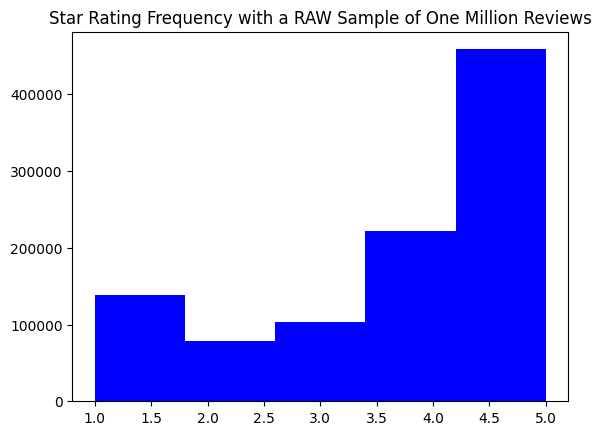

In [40]:
graph_star_freq_raw = plt.hist(yelp_sample_mil['stars'], bins=5, color='blue')
plt.title('Star Rating Frequency with a RAW Sample of One Million Reviews')

Text(0.5, 1.0, 'Star Rating Frequency with a NORMALIZED Sample of One Million Reviews')

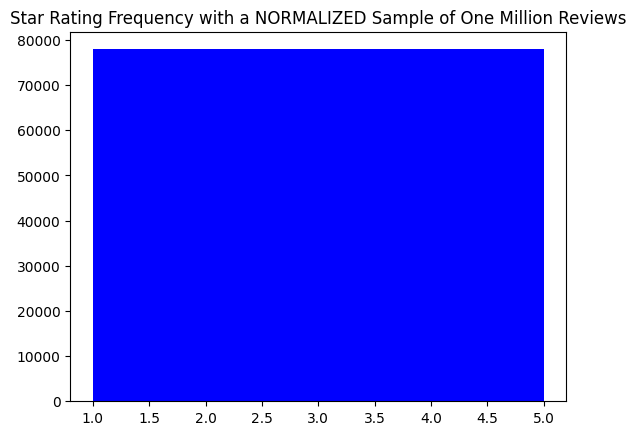

In [41]:
graph_star_freq_normal = plt.hist(yelp_sample_equal_mil['stars'], bins=5, color='blue')
plt.title('Star Rating Frequency with a NORMALIZED Sample of One Million Reviews')

We want to note here that our sample dataset is biased to more positive reviews than negative reviews. As a result, we should proceed with caution when classifying, training, and predicting with this dataset.

### 4.a.i. Classify 10,000 standardized reviews into 1-star (negative), 2-star (negative), 3-star (neutral), 4-star (positive), and 5-star (positive) classes and separate the dataset into X and Y subsets for prediction:

In [42]:
yelp_classify = yelp_sample_equal_ten_thou.loc[:, ['stars', 'text']]

print()
print("Shape of the dataset:", yelp_classify.shape)

x_ten_thou_five = yelp_classify['text']
y_ten_thou_five = yelp_classify['stars']

print()
print("A few X entries")
print(x_ten_thou_five)

print()
print("A few Y entries")
print(y_ten_thou_five)


Shape of the dataset: (3815, 2)

A few X entries
stars      
1.0    5       I am a long term frequent customer of this est...
       47      If you want to pay for everything a la carte t...
       64      The TV shows are $4.99 and they have commercia...
       73      If I could give it a zero, I would. I order a ...
       79      We visited once and were very disappointed in ...
                                     ...                        
5.0    1661    This little unassuming shop is tucked away in ...
       1662    Great food and good coffee. Wish they had more...
       1663    holly grove is the best. I'm consistently impr...
       1669    Henry was a rock star  getting us into a stora...
       1670    Phenomenal restaurant. Great location. Great a...
Name: text, Length: 3815, dtype: object

A few Y entries
stars      
1.0    5       1.0
       47      1.0
       64      1.0
       73      1.0
       79      1.0
              ... 
5.0    1661    5.0
       1662    5.0
  

### 4.a.ii. Classify 10,000 standardized reviews into 1-star (negative) and 5-star (positive) classes and separate the dataset into X and Y subsets for prediction:

In [43]:
yelp_classify = yelp_sample_equal_ten_thou.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_ten_thou_two = data_classes['text']
y_ten_thou_two = data_classes['stars']

print()
print("A few X entries")
print(x_ten_thou_two)

print()
print("A few Y entries")
print(y_ten_thou_two)


Shape of the dataset: (1526, 2)

A few X entries
stars      
1.0    5       I am a long term frequent customer of this est...
       47      If you want to pay for everything a la carte t...
       64      The TV shows are $4.99 and they have commercia...
       73      If I could give it a zero, I would. I order a ...
       79      We visited once and were very disappointed in ...
                                     ...                        
5.0    1661    This little unassuming shop is tucked away in ...
       1662    Great food and good coffee. Wish they had more...
       1663    holly grove is the best. I'm consistently impr...
       1669    Henry was a rock star  getting us into a stora...
       1670    Phenomenal restaurant. Great location. Great a...
Name: text, Length: 1526, dtype: object

A few Y entries
stars      
1.0    5       1.0
       47      1.0
       64      1.0
       73      1.0
       79      1.0
              ... 
5.0    1661    5.0
       1662    5.0
  

### 4.a.iii. Classify 10,000 standardized reviews into 1-star (negative), 3-star (neutral), and 5-star (positive) classes and separate the dataset into X and Y subsets for prediction:

In [44]:
yelp_classify = yelp_sample_equal_ten_thou.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==3) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_ten_thou_three = data_classes['text']
y_ten_thou_three = data_classes['stars']

print()
print("A few X entries")
print(x_ten_thou_three)

print()
print("A few Y entries")
print(y_ten_thou_three)


Shape of the dataset: (2289, 2)

A few X entries
stars      
1.0    5       I am a long term frequent customer of this est...
       47      If you want to pay for everything a la carte t...
       64      The TV shows are $4.99 and they have commercia...
       73      If I could give it a zero, I would. I order a ...
       79      We visited once and were very disappointed in ...
                                     ...                        
5.0    1661    This little unassuming shop is tucked away in ...
       1662    Great food and good coffee. Wish they had more...
       1663    holly grove is the best. I'm consistently impr...
       1669    Henry was a rock star  getting us into a stora...
       1670    Phenomenal restaurant. Great location. Great a...
Name: text, Length: 2289, dtype: object

A few Y entries
stars      
1.0    5       1.0
       47      1.0
       64      1.0
       73      1.0
       79      1.0
              ... 
5.0    1661    5.0
       1662    5.0
  

### 4.b.i. Classify 100,000 standardized reviews into 1-star (negative), 2-star (negative), 3-star (neutral), 4-star (positive), and 5-star (positive) classes and separate the dataset into X and Y subsets for prediction:

In [45]:
yelp_classify = yelp_sample_equal_hund_thou.loc[:, ['stars', 'text']]

print()
print("Shape of the dataset:", yelp_classify.shape)

x_hund_thou_five = yelp_classify['text']
y_hund_thou_five = yelp_classify['stars']

print()
print("A few X entries")
print(x_hund_thou_five)

print()
print("A few Y entries")
print(y_hund_thou_five)


Shape of the dataset: (39940, 2)

A few X entries
stars       
1.0    5        I am a long term frequent customer of this est...
       47       If you want to pay for everything a la carte t...
       64       The TV shows are $4.99 and they have commercia...
       73       If I could give it a zero, I would. I order a ...
       79       We visited once and were very disappointed in ...
                                      ...                        
5.0    17954    Amidst a long, exciting day of shopping, my fr...
       17958    Great services for a great price! Nail techs a...
       17959    The most amazing place for a guilt free breakf...
       17961    Super cute florist shop. Nice gifts (they offe...
       17964    Omg. The shrimp and grits were amazingly rich ...
Name: text, Length: 39940, dtype: object

A few Y entries
stars       
1.0    5        1.0
       47       1.0
       64       1.0
       73       1.0
       79       1.0
               ... 
5.0    17954    5.0

### 4.b.ii. Classify 100,000 standardized reviews into 1-star (negative) and 5-star (positive) classes and separate the dataset into X and Y subsets for prediction:

In [46]:
yelp_classify = yelp_sample_equal_hund_thou.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_hund_thou_two = data_classes['text']
y_hund_thou_two = data_classes['stars']

print()
print("A few X entries")
print(x_hund_thou_two)

print()
print("A few Y entries")
print(y_hund_thou_two)


Shape of the dataset: (15976, 2)

A few X entries
stars       
1.0    5        I am a long term frequent customer of this est...
       47       If you want to pay for everything a la carte t...
       64       The TV shows are $4.99 and they have commercia...
       73       If I could give it a zero, I would. I order a ...
       79       We visited once and were very disappointed in ...
                                      ...                        
5.0    17954    Amidst a long, exciting day of shopping, my fr...
       17958    Great services for a great price! Nail techs a...
       17959    The most amazing place for a guilt free breakf...
       17961    Super cute florist shop. Nice gifts (they offe...
       17964    Omg. The shrimp and grits were amazingly rich ...
Name: text, Length: 15976, dtype: object

A few Y entries
stars       
1.0    5        1.0
       47       1.0
       64       1.0
       73       1.0
       79       1.0
               ... 
5.0    17954    5.0

### 4.b.iii. Classify 100,000 standardized reviews into 1-star (negative), 3-star (neutral), and 5-star (positive) classes and separate the dataset into X and Y subsets for prediction:

In [47]:
yelp_classify = yelp_sample_equal_hund_thou.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==3) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_hund_thou_three = data_classes['text']
y_hund_thou_three = data_classes['stars']

print()
print("A few X entries")
print(x_hund_thou_three)

print()
print("A few Y entries")
print(y_hund_thou_three)


Shape of the dataset: (23964, 2)

A few X entries
stars       
1.0    5        I am a long term frequent customer of this est...
       47       If you want to pay for everything a la carte t...
       64       The TV shows are $4.99 and they have commercia...
       73       If I could give it a zero, I would. I order a ...
       79       We visited once and were very disappointed in ...
                                      ...                        
5.0    17954    Amidst a long, exciting day of shopping, my fr...
       17958    Great services for a great price! Nail techs a...
       17959    The most amazing place for a guilt free breakf...
       17961    Super cute florist shop. Nice gifts (they offe...
       17964    Omg. The shrimp and grits were amazingly rich ...
Name: text, Length: 23964, dtype: object

A few Y entries
stars       
1.0    5        1.0
       47       1.0
       64       1.0
       73       1.0
       79       1.0
               ... 
5.0    17954    5.0

### 4.c.i. Classify 1,000,000 standardized reviews into 1-star (negative), 2-star (negative), 3-star (neutral), 4-star (positive), and 5-star (positive) classes and separate the dataset into X and Y subsets for prediction:

In [48]:
yelp_classify = yelp_sample_equal_mil.loc[:, ['stars', 'text']]

print()
print("Shape of the dataset:", yelp_classify.shape)

x_mil_five = data_classes['text']
y_mil_five = data_classes['stars']

print()
print("A few X entries")
print(x_mil_five)

print()
print("A few Y entries")
print(y_mil_five)


Shape of the dataset: (389560, 2)

A few X entries
stars       
1.0    5        I am a long term frequent customer of this est...
       47       If you want to pay for everything a la carte t...
       64       The TV shows are $4.99 and they have commercia...
       73       If I could give it a zero, I would. I order a ...
       79       We visited once and were very disappointed in ...
                                      ...                        
5.0    17954    Amidst a long, exciting day of shopping, my fr...
       17958    Great services for a great price! Nail techs a...
       17959    The most amazing place for a guilt free breakf...
       17961    Super cute florist shop. Nice gifts (they offe...
       17964    Omg. The shrimp and grits were amazingly rich ...
Name: text, Length: 23964, dtype: object

A few Y entries
stars       
1.0    5        1.0
       47       1.0
       64       1.0
       73       1.0
       79       1.0
               ... 
5.0    17954    5.

### 4.c.ii. Classify 1,000,000 standardized reviews into 1-star (negative) and 5-star (positive) classes and separate the dataset into X and Y subsets for prediction:

In [49]:
yelp_classify = yelp_sample_equal_mil.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_mil_two = data_classes['text']
y_mil_two = data_classes['stars']

print()
print("A few X entries")
print(x_mil_two)

print()
print("A few Y entries")
print(y_mil_two)


Shape of the dataset: (155824, 2)

A few X entries
stars        
1.0    5         I am a long term frequent customer of this est...
       47        If you want to pay for everything a la carte t...
       64        The TV shows are $4.99 and they have commercia...
       73        If I could give it a zero, I would. I order a ...
       79        We visited once and were very disappointed in ...
                                       ...                        
5.0    175390    Donuts are one of those indulgences I rarely a...
       175398    Always delicious and clean! Jenny and manager ...
       175401    Thank god we found this place. The nonni pizza...
       175408    Such a great area.  South Street, Philly is fu...
       175409    Great little place for lunch or dinner or grab...
Name: text, Length: 155824, dtype: object

A few Y entries
stars        
1.0    5         1.0
       47        1.0
       64        1.0
       73        1.0
       79        1.0
                ...

### 4.c.iii. Classify 1,000,000 standardized reviews into 1-star (negative), 3-star (neutral), and 5-star (positive) classes and separate the dataset into X and Y subsets for prediction:

In [50]:
yelp_classify = yelp_sample_equal_mil.loc[:, ['stars', 'text']]
data_classes = yelp_classify[(yelp_classify['stars']==1) | 
                           (yelp_classify['stars']==3) | 
                           (yelp_classify['stars']==5)]

print()
print("Shape of the dataset:", data_classes.shape)

x_mil_three = data_classes['text']
y_mil_three = data_classes['stars']

print()
print("A few X entries")
print(x_mil_three)

print()
print("A few Y entries")
print(y_mil_three)


Shape of the dataset: (233736, 2)

A few X entries
stars        
1.0    5         I am a long term frequent customer of this est...
       47        If you want to pay for everything a la carte t...
       64        The TV shows are $4.99 and they have commercia...
       73        If I could give it a zero, I would. I order a ...
       79        We visited once and were very disappointed in ...
                                       ...                        
5.0    175390    Donuts are one of those indulgences I rarely a...
       175398    Always delicious and clean! Jenny and manager ...
       175401    Thank god we found this place. The nonni pizza...
       175408    Such a great area.  South Street, Philly is fu...
       175409    Great little place for lunch or dinner or grab...
Name: text, Length: 233736, dtype: object

A few Y entries
stars        
1.0    5         1.0
       47        1.0
       64        1.0
       73        1.0
       79        1.0
                ...

### 5. Clean the review text by removing stopwords and punctuation:

In [51]:
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

### 6.a.i. Convert 10,000 (1-star, 2-star, 3-star, 4-star, and 5-star) reviews into vectors:

In [52]:
vocab_ten_thou_five = CountVectorizer(analyzer=process_text).fit(x_ten_thou_five)
r1 = x_ten_thou_five[1]
vocab1 = vocab_ten_thou_five.transform([r1])

print()
print("Number of possible words:", len(vocab_ten_thou_five.vocabulary_))

print()
print("Sample Uncleaned Review:")
print(r1)

print()
print("Vectorized Review:")
print(vocab1)

print()
print("Return word from index 5000:", vocab_ten_thou_five.get_feature_names_out()[5000])
print("Return word from index 20000:", vocab_ten_thou_five.get_feature_names_out()[10000])


Number of possible words: 21208

Sample Uncleaned Review:
5       I am a long term frequent customer of this est...
47      If you want to pay for everything a la carte t...
64      The TV shows are $4.99 and they have commercia...
73      If I could give it a zero, I would. I order a ...
79      We visited once and were very disappointed in ...
                              ...                        
6983    Awful. Avoid this place. I took my car here on...
6988    This was my second time going \nFirst time ser...
6989    One star isn't even low enough for how I am fe...
6998    I went to the drive thru hopefully I can get s...
7009    Horrible customer service.  Customers should b...
Name: text, Length: 763, dtype: object

Vectorized Review:
  (0, 0)	7
  (0, 22)	45
  (0, 23)	46
  (0, 24)	2
  (0, 33)	1
  (0, 51)	1
  (0, 54)	1
  (0, 57)	1
  (0, 58)	1
  (0, 60)	2
  (0, 61)	1
  (0, 84)	1
  (0, 86)	1
  (0, 88)	2
  (0, 90)	1
  (0, 123)	1
  (0, 124)	2
  (0, 133)	1
  (0, 139)	50
  (0, 140)

### 6.a.ii. Convert 10,000 (1-star and 5-star) reviews into vectors:

In [53]:
vocab_ten_thou_two = CountVectorizer(analyzer=process_text).fit(x_ten_thou_two)
r1 = x_ten_thou_two[1]
vocab1 = vocab_ten_thou_two.transform([r1])

print()
print("Number of possible words:", len(vocab_ten_thou_two.vocabulary_))

print()
print("Sample Uncleaned Review:")
print(r1)

print()
print("Vectorized Review:")
print(vocab1)

print()
print("Return word from index 5000:", vocab_ten_thou_two.get_feature_names_out()[5000])
print("Return word from index 20000:", vocab_ten_thou_two.get_feature_names_out()[10000])


Number of possible words: 12741

Sample Uncleaned Review:
5       I am a long term frequent customer of this est...
47      If you want to pay for everything a la carte t...
64      The TV shows are $4.99 and they have commercia...
73      If I could give it a zero, I would. I order a ...
79      We visited once and were very disappointed in ...
                              ...                        
6983    Awful. Avoid this place. I took my car here on...
6988    This was my second time going \nFirst time ser...
6989    One star isn't even low enough for how I am fe...
6998    I went to the drive thru hopefully I can get s...
7009    Horrible customer service.  Customers should b...
Name: text, Length: 763, dtype: object

Vectorized Review:
  (0, 0)	7
  (0, 10)	45
  (0, 11)	46
  (0, 12)	2
  (0, 20)	1
  (0, 31)	1
  (0, 34)	1
  (0, 35)	1
  (0, 36)	1
  (0, 37)	2
  (0, 38)	1
  (0, 49)	1
  (0, 50)	1
  (0, 52)	2
  (0, 54)	1
  (0, 70)	1
  (0, 71)	2
  (0, 76)	1
  (0, 80)	50
  (0, 81)	3
  

### 6.a.iii. Convert 10,000 (1-star, 3-star, and 5-star) reviews into vectors:

In [54]:
vocab_ten_thou_three = CountVectorizer(analyzer=process_text).fit(x_ten_thou_three)
r1 = x_ten_thou_three[1]
vocab1 = vocab_ten_thou_three.transform([r1])

print()
print("Number of possible words:", len(vocab_ten_thou_three.vocabulary_))

print()
print("Sample Uncleaned Review:")
print(r1)

print()
print("Vectorized Review:")
print(vocab1)

print()
print("Return word from index 5000:", vocab_ten_thou_three.get_feature_names_out()[5000])
print("Return word from index 20000:", vocab_ten_thou_three.get_feature_names_out()[10000])


Number of possible words: 15946

Sample Uncleaned Review:
5       I am a long term frequent customer of this est...
47      If you want to pay for everything a la carte t...
64      The TV shows are $4.99 and they have commercia...
73      If I could give it a zero, I would. I order a ...
79      We visited once and were very disappointed in ...
                              ...                        
6983    Awful. Avoid this place. I took my car here on...
6988    This was my second time going \nFirst time ser...
6989    One star isn't even low enough for how I am fe...
6998    I went to the drive thru hopefully I can get s...
7009    Horrible customer service.  Customers should b...
Name: text, Length: 763, dtype: object

Vectorized Review:
  (0, 0)	7
  (0, 15)	45
  (0, 16)	46
  (0, 17)	2
  (0, 25)	1
  (0, 38)	1
  (0, 41)	1
  (0, 43)	1
  (0, 44)	1
  (0, 45)	2
  (0, 46)	1
  (0, 62)	1
  (0, 63)	1
  (0, 65)	2
  (0, 67)	1
  (0, 85)	1
  (0, 86)	2
  (0, 91)	1
  (0, 95)	50
  (0, 96)	3
  

### 6.b.i. Convert 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) reviews into vectors:

In [55]:
vocab_hund_thou_five = CountVectorizer(analyzer=process_text).fit(x_hund_thou_five)
r1 = x_hund_thou_five[1]
vocab1 = vocab_hund_thou_five.transform([r1])

print()
print("Number of possible words:", len(vocab_hund_thou_five.vocabulary_))

print()
print("Sample Uncleaned Review:")
print(r1)

print()
print("Vectorized Review:")
print(vocab1)

print()
print("Return word from index 5000:", vocab_hund_thou_five.get_feature_names_out()[5000])
print("Return word from index 20000:", vocab_hund_thou_five.get_feature_names_out()[20000])


Number of possible words: 76896

Sample Uncleaned Review:
5        I am a long term frequent customer of this est...
47       If you want to pay for everything a la carte t...
64       The TV shows are $4.99 and they have commercia...
73       If I could give it a zero, I would. I order a ...
79       We visited once and were very disappointed in ...
                               ...                        
73375    So I've never been to BK, but I'd always heard...
73382    Went to Praline Connection in 2004 and loved i...
73390    There's a reason a nail salon is empty at noon...
73401    TERRIBLE, TERRIBLE SERVICE. Got the wild salmo...
73426    The order was not correct and a member of the ...
Name: text, Length: 7988, dtype: object

Vectorized Review:
  (0, 0)	79
  (0, 85)	1
  (0, 88)	1
  (0, 89)	419
  (0, 90)	493
  (0, 91)	23
  (0, 92)	7
  (0, 106)	1
  (0, 108)	1
  (0, 109)	1
  (0, 120)	1
  (0, 123)	1
  (0, 125)	2
  (0, 162)	1
  (0, 207)	1
  (0, 210)	1
  (0, 215)	1
  (0, 216)	3


### 6.b.ii. Convert 100,000 (1-star and 5-star) reviews into vectors:

In [56]:
vocab_hund_thou_two = CountVectorizer(analyzer=process_text).fit(x_hund_thou_two)
r1 = x_hund_thou_two[1]
vocab1 = vocab_hund_thou_two.transform([r1])

print()
print("Number of possible words:", len(vocab_hund_thou_two.vocabulary_))

print()
print("Sample Uncleaned Review:")
print(r1)

print()
print("Vectorized Review:")
print(vocab1)

print()
print("Return word from index 5000:", vocab_hund_thou_two.get_feature_names_out()[5000])
print("Return word from index 20000:", vocab_hund_thou_two.get_feature_names_out()[20000])


Number of possible words: 45501

Sample Uncleaned Review:
5        I am a long term frequent customer of this est...
47       If you want to pay for everything a la carte t...
64       The TV shows are $4.99 and they have commercia...
73       If I could give it a zero, I would. I order a ...
79       We visited once and were very disappointed in ...
                               ...                        
73375    So I've never been to BK, but I'd always heard...
73382    Went to Praline Connection in 2004 and loved i...
73390    There's a reason a nail salon is empty at noon...
73401    TERRIBLE, TERRIBLE SERVICE. Got the wild salmo...
73426    The order was not correct and a member of the ...
Name: text, Length: 7988, dtype: object

Vectorized Review:
  (0, 0)	79
  (0, 48)	1
  (0, 50)	1
  (0, 51)	419
  (0, 52)	493
  (0, 53)	23
  (0, 54)	7
  (0, 65)	1
  (0, 67)	1
  (0, 68)	1
  (0, 75)	1
  (0, 77)	1
  (0, 78)	2
  (0, 100)	1
  (0, 127)	1
  (0, 129)	1
  (0, 131)	1
  (0, 132)	3
  (0, 

### 6.b.iii. Convert 100,000 (1-star, 3-star, and 5-star) reviews into vectors:

In [57]:
vocab_hund_thou_three = CountVectorizer(analyzer=process_text).fit(x_hund_thou_three)
r1 = x_hund_thou_three[1]
vocab1 = vocab_hund_thou_three.transform([r1])

print()
print("Number of possible words:", len(vocab_hund_thou_three.vocabulary_))

print()
print("Sample Uncleaned Review:")
print(r1)

print()
print("Vectorized Review:")
print(vocab1)

print()
print("Return word from index 5000:", vocab_hund_thou_three.get_feature_names_out()[5000])
print("Return word from index 20000:", vocab_hund_thou_three.get_feature_names_out()[20000])


Number of possible words: 57720

Sample Uncleaned Review:
5        I am a long term frequent customer of this est...
47       If you want to pay for everything a la carte t...
64       The TV shows are $4.99 and they have commercia...
73       If I could give it a zero, I would. I order a ...
79       We visited once and were very disappointed in ...
                               ...                        
73375    So I've never been to BK, but I'd always heard...
73382    Went to Praline Connection in 2004 and loved i...
73390    There's a reason a nail salon is empty at noon...
73401    TERRIBLE, TERRIBLE SERVICE. Got the wild salmo...
73426    The order was not correct and a member of the ...
Name: text, Length: 7988, dtype: object

Vectorized Review:
  (0, 0)	79
  (0, 59)	1
  (0, 61)	1
  (0, 62)	419
  (0, 63)	493
  (0, 64)	23
  (0, 65)	7
  (0, 77)	1
  (0, 79)	1
  (0, 80)	1
  (0, 88)	1
  (0, 90)	1
  (0, 92)	2
  (0, 119)	1
  (0, 151)	1
  (0, 153)	1
  (0, 156)	1
  (0, 157)	3
  (0, 

### 6.c.i. Convert 1,000,000 (1-star, 2-star, 3-star, 4-star, and 5-star) reviews into vectors:

In [58]:
vocab_mil_five = CountVectorizer(analyzer=process_text).fit(x_mil_five)
r1 = x_mil_five[1]
vocab1 = vocab_mil_five.transform([r1])

print()
print("Number of possible words:", len(vocab_mil_five.vocabulary_))

print()
print("Sample Uncleaned Review:")
print(r1)

print()
print("Vectorized Review:")
print(vocab1)

print()
print("Return word from index 5000:", vocab_mil_five.get_feature_names_out()[5000])
print("Return word from index 20000:", vocab_mil_five.get_feature_names_out()[20000])


Number of possible words: 57720

Sample Uncleaned Review:
5        I am a long term frequent customer of this est...
47       If you want to pay for everything a la carte t...
64       The TV shows are $4.99 and they have commercia...
73       If I could give it a zero, I would. I order a ...
79       We visited once and were very disappointed in ...
                               ...                        
73375    So I've never been to BK, but I'd always heard...
73382    Went to Praline Connection in 2004 and loved i...
73390    There's a reason a nail salon is empty at noon...
73401    TERRIBLE, TERRIBLE SERVICE. Got the wild salmo...
73426    The order was not correct and a member of the ...
Name: text, Length: 7988, dtype: object

Vectorized Review:
  (0, 0)	79
  (0, 59)	1
  (0, 61)	1
  (0, 62)	419
  (0, 63)	493
  (0, 64)	23
  (0, 65)	7
  (0, 77)	1
  (0, 79)	1
  (0, 80)	1
  (0, 88)	1
  (0, 90)	1
  (0, 92)	2
  (0, 119)	1
  (0, 151)	1
  (0, 153)	1
  (0, 156)	1
  (0, 157)	3
  (0, 

### 6.c.ii. Convert 1,000,000 (1-star and 5-star) reviews into vectors:

In [59]:
vocab_mil_two = CountVectorizer(analyzer=process_text).fit(x_mil_two)
r1 = x_mil_two[1]
vocab1 = vocab_mil_two.transform([r1])

print()
print("Number of possible words:", len(vocab_mil_two.vocabulary_))

print()
print("Sample Uncleaned Review:")
print(r1)

print()
print("Vectorized Review:")
print(vocab1)

print()
print("Return word from index 5000:", vocab_mil_two.get_feature_names_out()[5000])
print("Return word from index 20000:", vocab_mil_two.get_feature_names_out()[20000])


Number of possible words: 167844

Sample Uncleaned Review:
5         I am a long term frequent customer of this est...
47        If you want to pay for everything a la carte t...
64        The TV shows are $4.99 and they have commercia...
73        If I could give it a zero, I would. I order a ...
79        We visited once and were very disappointed in ...
                                ...                        
566370    Not a real problem with the food, it is McDona...
566371    Horrible!Horrible!Horrible! False claims! My l...
566380    I used this company to manage a rental propert...
566382    Very disappointing.  Fried okra and French fri...
566386    Let me start out with the one positive and rea...
Name: text, Length: 77912, dtype: object

Vectorized Review:
  (0, 0)	1021
  (0, 1)	6
  (0, 2)	3
  (0, 3)	1
  (0, 5)	1
  (0, 9)	1
  (0, 31)	2
  (0, 47)	1
  (0, 58)	1
  (0, 84)	1
  (0, 126)	1
  (0, 138)	1
  (0, 162)	6
  (0, 191)	2
  (0, 216)	2
  (0, 217)	1
  (0, 229)	1
  (0, 241)	

### 6.c.iii. Convert 1,000,000 (1-star, 3-star, and 5-star) reviews into vectors:

In [60]:
vocab_mil_three = CountVectorizer(analyzer=process_text).fit(x_mil_three)
r1 = x_mil_three[1]
vocab1 = vocab_mil_three.transform([r1])

print()
print("Number of possible words:", len(vocab_mil_three.vocabulary_))

print()
print("Sample Uncleaned Review:")
print(r1)

print()
print("Vectorized Review:")
print(vocab1)

print()
print("Return word from index 5000:", vocab_mil_three.get_feature_names_out()[5000])
print("Return word from index 20000:", vocab_mil_three.get_feature_names_out()[20000])


Number of possible words: 218502

Sample Uncleaned Review:
5         I am a long term frequent customer of this est...
47        If you want to pay for everything a la carte t...
64        The TV shows are $4.99 and they have commercia...
73        If I could give it a zero, I would. I order a ...
79        We visited once and were very disappointed in ...
                                ...                        
566370    Not a real problem with the food, it is McDona...
566371    Horrible!Horrible!Horrible! False claims! My l...
566380    I used this company to manage a rental propert...
566382    Very disappointing.  Fried okra and French fri...
566386    Let me start out with the one positive and rea...
Name: text, Length: 77912, dtype: object

Vectorized Review:
  (0, 0)	1021
  (0, 1)	6
  (0, 2)	3
  (0, 3)	1
  (0, 5)	1
  (0, 9)	1
  (0, 34)	2
  (0, 51)	1
  (0, 62)	1
  (0, 95)	1
  (0, 145)	1
  (0, 159)	1
  (0, 185)	6
  (0, 223)	2
  (0, 254)	2
  (0, 255)	1
  (0, 268)	1
  (0, 280)	

### 7.a.i. Vectorize all 10,000 (1-star, 2-star, 3-star, 4-star, and 5-star) reviews and split processed dataset into training and testing sets:

In [61]:
x_ten_thou_five = vocab_ten_thou_five.transform(x_ten_thou_five)
x_train_ten_thou_five, x_test_ten_thou_five, y_train_ten_thou_five, y_test_ten_thou_five = train_test_split(x_ten_thou_five, y_ten_thou_five, test_size=0.2, random_state=101)

### 7.a.ii. Vectorize all 10,000 (1-star and 5-star) reviews and split processed dataset into training and testing sets:

In [62]:
x_ten_thou_two = vocab_ten_thou_two.transform(x_ten_thou_two)
x_train_ten_thou_two, x_test_ten_thou_two, y_train_ten_thou_two, y_test_ten_thou_two = train_test_split(x_ten_thou_two, y_ten_thou_two, test_size=0.2, random_state=101)

### 7.a.iii. Vectorize all 10,000 (1-star, 3-star, and 5-star) reviews and split processed dataset into training and testing sets:

In [63]:
x_ten_thou_three = vocab_ten_thou_three.transform(x_ten_thou_three)
x_train_ten_thou_three, x_test_ten_thou_three, y_train_ten_thou_three, y_test_ten_thou_three = train_test_split(x_ten_thou_three, y_ten_thou_three, test_size=0.2, random_state=101)

### 7.b.i. Vectorize all 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) reviews and split processed dataset into training and testing sets:

In [64]:
x_hund_thou_five = vocab_hund_thou_five.transform(x_hund_thou_five)
x_train_hund_thou_five, x_test_hund_thou_five, y_train_hund_thou_five, y_test_hund_thou_five = train_test_split(x_hund_thou_five, y_hund_thou_five, test_size=0.2, random_state=101)

### 7.b.ii. Vectorize all 100,000 (1-star and 5-star) reviews and split processed dataset into training and testing sets:

In [65]:
x_hund_thou_two = vocab_hund_thou_two.transform(x_hund_thou_two)
x_train_hund_thou_two, x_test_hund_thou_two, y_train_hund_thou_two, y_test_hund_thou_two = train_test_split(x_hund_thou_two, y_hund_thou_two, test_size=0.2, random_state=101)

### 7.b.iii. Vectorize all 100,000 (1-star, 3-star, and 5-star) reviews and split processed dataset into training and testing sets:

In [66]:
x_hund_thou_three = vocab_hund_thou_three.transform(x_hund_thou_three)
x_train_hund_thou_three, x_test_hund_thou_three, y_train_hund_thou_three, y_test_hund_thou_three = train_test_split(x_hund_thou_three, y_hund_thou_three, test_size=0.2, random_state=101)

### 7.c.i. Vectorize all 1,000,000 (1-star, 2-star, 3-star, 4-star, and 5-star) reviews and split processed dataset into training and testing sets:

In [67]:
x_mil_five = vocab_mil_five.transform(x_mil_five)
x_train_mil_five, x_test_mil_five, y_train_mil_five, y_test_mil_five = train_test_split(x_mil_five, y_mil_five, test_size=0.2, random_state=101)

### 7.c.ii. Vectorize all 1,000,000 (1-star and 5-star) reviews and split processed dataset into training and testing sets:

In [68]:
x_mil_two = vocab_mil_two.transform(x_mil_two)
x_train_mil_two, x_test_mil_two, y_train_mil_two, y_test_mil_two = train_test_split(x_mil_two, y_mil_two, test_size=0.2, random_state=101)

### 7.c.iii. Vectorize all 1,000,000 (1-star, 3-star, and 5-star) reviews and split processed dataset into training and testing sets:

In [69]:
x_mil_three = vocab_mil_three.transform(x_mil_three)
x_train_mil_three, x_test_mil_three, y_train_mil_three, y_test_mil_three = train_test_split(x_mil_three, y_mil_three, test_size=0.2, random_state=101)

### 8.a.i. Modeling 10,000 (1-star, 2-star, 3-star, 4-star, and 5-star) reviews with Multinomial Naive Bayes (since we're working with sparse data, we cannot rely on the Gaussian Naive Bayes assumptions):

In [70]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb_ten_5 = MultinomialNB()
mnb_ten_5.fit(x_train_ten_thou_five, y_train_ten_thou_five)
predmnb = mnb_ten_5.predict(x_test_ten_thou_five)

print()
print("Score:", round(accuracy_score(y_test_ten_thou_five, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_five, predmnb))


Score: 47.05

Classification Report:
              precision    recall  f1-score   support

         1.0       0.59      0.68      0.63       145
         2.0       0.43      0.39      0.41       163
         3.0       0.37      0.48      0.42       149
         4.0       0.41      0.47      0.44       156
         5.0       0.70      0.34      0.46       150

    accuracy                           0.47       763
   macro avg       0.50      0.47      0.47       763
weighted avg       0.50      0.47      0.47       763



### 8.a.ii. Modeling 10,000 (1-star and 5-star) reviews with Multinomial Naive Bayes:

In [71]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb_ten_2 = MultinomialNB()
mnb_ten_2.fit(x_train_ten_thou_two, y_train_ten_thou_two)
predmnb = mnb_ten_2.predict(x_test_ten_thou_two)

print()
print("Score:", round(accuracy_score(y_test_ten_thou_two, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_two, predmnb))


Score: 90.52

Classification Report:
              precision    recall  f1-score   support

         1.0       0.92      0.90      0.91       156
         5.0       0.90      0.91      0.90       150

    accuracy                           0.91       306
   macro avg       0.91      0.91      0.91       306
weighted avg       0.91      0.91      0.91       306



### 8.a.iii. Modeling 10,000 (1-star, 3-star, and 5-star) reviews with Multinomial Naive Bayes:

In [72]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb_ten_3 = MultinomialNB()
mnb_ten_3.fit(x_train_ten_thou_three, y_train_ten_thou_three)
predmnb = mnb_ten_3.predict(x_test_ten_thou_three)

print()
print("Score:", round(accuracy_score(y_test_ten_thou_three, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_three, predmnb))


Score: 74.67

Classification Report:
              precision    recall  f1-score   support

         1.0       0.78      0.81      0.79       153
         3.0       0.67      0.75      0.70       166
         5.0       0.83      0.68      0.75       139

    accuracy                           0.75       458
   macro avg       0.76      0.74      0.75       458
weighted avg       0.75      0.75      0.75       458



### 8.b.i. Modeling 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) reviews with Multinomial Naive Bayes:

In [73]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb_hund_5 = MultinomialNB()
mnb_hund_5.fit(x_train_hund_thou_five, y_train_hund_thou_five)
predmnb = mnb_hund_5.predict(x_test_hund_thou_five)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_five, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_five, predmnb))


Score: 52.77

Classification Report:
              precision    recall  f1-score   support

         1.0       0.63      0.67      0.65      1626
         2.0       0.45      0.46      0.46      1584
         3.0       0.44      0.47      0.46      1650
         4.0       0.47      0.50      0.48      1596
         5.0       0.68      0.54      0.60      1532

    accuracy                           0.53      7988
   macro avg       0.54      0.53      0.53      7988
weighted avg       0.54      0.53      0.53      7988



### 8.b.ii. Modeling 100,000 (1-star and 5-star) reviews with Multinomial Naive Bayes:

In [100]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb_hund_2 = MultinomialNB()
mnb_hund_2.fit(x_train_hund_thou_two, y_train_hund_thou_two)
predmnb = mnb_hund_2.predict(x_test_hund_thou_two)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_two, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_two, predmnb))


Score: 94.9

Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95      1604
         5.0       0.95      0.94      0.95      1592

    accuracy                           0.95      3196
   macro avg       0.95      0.95      0.95      3196
weighted avg       0.95      0.95      0.95      3196



### 8.b.iii. Modeling 100,000 (1-star, 3-star, and 5-star) reviews with Multinomial Naive Bayes:

In [75]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb_hund_3 = MultinomialNB()
mnb_hund_3.fit(x_train_hund_thou_three, y_train_hund_thou_three)
predmnb = mnb_hund_3.predict(x_test_hund_thou_three)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_three, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_three, predmnb))


Score: 78.24

Classification Report:
              precision    recall  f1-score   support

         1.0       0.83      0.80      0.81      1640
         3.0       0.68      0.78      0.73      1604
         5.0       0.87      0.77      0.81      1549

    accuracy                           0.78      4793
   macro avg       0.79      0.78      0.78      4793
weighted avg       0.79      0.78      0.78      4793



### 8.c.i. Modeling 1,000,000 (1-star, 2-star, 3-star, 4-star, and 5-star) reviews with Multinomial Naive Bayes:

In [76]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb_mil_5 = MultinomialNB()
mnb_mil_5.fit(x_train_mil_five, y_train_mil_five)
predmnb = mnb_mil_5.predict(x_test_mil_five)

print()
print("Score:", round(accuracy_score(y_test_mil_five, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_five, predmnb))


Score: 78.24

Classification Report:
              precision    recall  f1-score   support

         1.0       0.83      0.80      0.81      1640
         3.0       0.68      0.78      0.73      1604
         5.0       0.87      0.77      0.81      1549

    accuracy                           0.78      4793
   macro avg       0.79      0.78      0.78      4793
weighted avg       0.79      0.78      0.78      4793



### 8.c.ii. Modeling 1,000,000 (1-star and 5-star) reviews with Multinomial Naive Bayes:

In [77]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb_mil_2 = MultinomialNB()
mnb_mil_2.fit(x_train_mil_two, y_train_mil_two)
predmnb = mnb_mil_2.predict(x_test_mil_two)

print()
print("Score:", round(accuracy_score(y_test_mil_two, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_two, predmnb))


Score: 93.54

Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.93      0.93     15574
         5.0       0.93      0.94      0.94     15591

    accuracy                           0.94     31165
   macro avg       0.94      0.94      0.94     31165
weighted avg       0.94      0.94      0.94     31165



### 8.c.iii. Modeling 1,000,000 (1-star, 3-star, and 5-star) reviews with Multinomial Naive Bayes:

In [78]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb_mil_3= MultinomialNB()
mnb_mil_3.fit(x_train_mil_three, y_train_mil_three)
predmnb = mnb_mil_3.predict(x_test_mil_three)

print()
print("Score:", round(accuracy_score(y_test_mil_three, predmnb) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_three, predmnb))


Score: 79.66

Classification Report:
              precision    recall  f1-score   support

         1.0       0.81      0.78      0.80     15566
         3.0       0.70      0.78      0.74     15502
         5.0       0.89      0.83      0.86     15680

    accuracy                           0.80     46748
   macro avg       0.80      0.80      0.80     46748
weighted avg       0.80      0.80      0.80     46748



### 9.a.i. Modeling 10,000 (1-star, 2-star, 3-star, 4-star, and 5-star) reviews with Random Forest Classifier:

In [79]:
from sklearn.ensemble import RandomForestClassifier
rmfr_ten_5 = RandomForestClassifier()
rmfr_ten_5.fit(x_train_ten_thou_five, y_train_ten_thou_five)
predrmfr = rmfr_ten_5.predict(x_test_ten_thou_five)

print()
print("Score:", round(accuracy_score(y_test_ten_thou_five, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_five, predrmfr))


Score: 41.81

Classification Report:
              precision    recall  f1-score   support

         1.0       0.47      0.66      0.55       145
         2.0       0.44      0.23      0.30       163
         3.0       0.33      0.36      0.35       149
         4.0       0.38      0.25      0.30       156
         5.0       0.45      0.62      0.52       150

    accuracy                           0.42       763
   macro avg       0.41      0.42      0.40       763
weighted avg       0.41      0.42      0.40       763



### 9.a.ii. Modeling 10,000 (1-star and 5-star) reviews with Random Forest Classifier:

In [80]:
from sklearn.ensemble import RandomForestClassifier
rmfr_ten_2 = RandomForestClassifier()
rmfr_ten_2.fit(x_train_ten_thou_two, y_train_ten_thou_two)
predrmfr = rmfr_ten_2.predict(x_test_ten_thou_two)

print()
print("Score:", round(accuracy_score(y_test_ten_thou_two, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_two, predrmfr))


Score: 91.18

Classification Report:
              precision    recall  f1-score   support

         1.0       0.92      0.91      0.91       156
         5.0       0.91      0.91      0.91       150

    accuracy                           0.91       306
   macro avg       0.91      0.91      0.91       306
weighted avg       0.91      0.91      0.91       306



### 9.a.iii. Modeling 10,000 (1-star, 3-star, and 5-star) reviews with Random Forest Classifier:

In [81]:
from sklearn.ensemble import RandomForestClassifier
rmfr_ten_3 = RandomForestClassifier()
rmfr_ten_3.fit(x_train_ten_thou_three, y_train_ten_thou_three)
predrmfr = rmfr_ten_3.predict(x_test_ten_thou_three)

print()
print("Score:", round(accuracy_score(y_test_ten_thou_three, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_three, predrmfr))


Score: 70.09

Classification Report:
              precision    recall  f1-score   support

         1.0       0.72      0.86      0.78       153
         3.0       0.72      0.54      0.62       166
         5.0       0.66      0.71      0.69       139

    accuracy                           0.70       458
   macro avg       0.70      0.71      0.70       458
weighted avg       0.70      0.70      0.69       458



### 9.b.i. Modeling 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) reviews with Random Forest Classifier:

In [82]:
from sklearn.ensemble import RandomForestClassifier
rmfr_hund_5 = RandomForestClassifier()
rmfr_hund_5.fit(x_train_hund_thou_five, y_train_hund_thou_five)
predrmfr = rmfr_hund_5.predict(x_test_hund_thou_five)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_five, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_five, predrmfr))


Score: 49.67

Classification Report:
              precision    recall  f1-score   support

         1.0       0.55      0.78      0.64      1626
         2.0       0.45      0.33      0.38      1584
         3.0       0.45      0.36      0.40      1650
         4.0       0.43      0.32      0.37      1596
         5.0       0.54      0.69      0.61      1532

    accuracy                           0.50      7988
   macro avg       0.48      0.50      0.48      7988
weighted avg       0.48      0.50      0.48      7988



### 9.b.ii. Modeling 100,000 (1-star and 5-star) reviews with Random Forest Classifier:

In [83]:
from sklearn.ensemble import RandomForestClassifier
rmfr_hund_2 = RandomForestClassifier()
rmfr_hund_2.fit(x_train_hund_thou_two, y_train_hund_thou_two)
predrmfr = rmfr_hund_2.predict(x_test_hund_thou_two)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_two, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_two, predrmfr))


Score: 93.71

Classification Report:
              precision    recall  f1-score   support

         1.0       0.92      0.96      0.94      1604
         5.0       0.95      0.92      0.94      1592

    accuracy                           0.94      3196
   macro avg       0.94      0.94      0.94      3196
weighted avg       0.94      0.94      0.94      3196



### 9.b.iii. Modeling 100,000 (1-star, 3-star, and 5-star) reviews with Random Forest Classifier:

In [84]:
from sklearn.ensemble import RandomForestClassifier
rmfr_hund_3 = RandomForestClassifier()
rmfr_hund_3.fit(x_train_hund_thou_three, y_train_hund_thou_three)
predrmfr = rmfr_hund_3.predict(x_test_hund_thou_three)

print()
print("Score:", round(accuracy_score(y_test_hund_thou_three, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_three, predrmfr))


Score: 76.84

Classification Report:
              precision    recall  f1-score   support

         1.0       0.78      0.85      0.81      1640
         3.0       0.73      0.65      0.69      1604
         5.0       0.79      0.81      0.80      1549

    accuracy                           0.77      4793
   macro avg       0.77      0.77      0.77      4793
weighted avg       0.77      0.77      0.77      4793



### 9.c.i. Modeling 1,000,000 (1-star, 2-star, 3-star, 4-star, and 5-star) reviews with Random Forest Classifier:

In [85]:
from sklearn.ensemble import RandomForestClassifier
rmfr_mil_5 = RandomForestClassifier()
rmfr_mil_5.fit(x_train_mil_five, y_train_mil_five)
predrmfr = rmfr_mil_5.predict(x_test_mil_five)

print()
print("Score:", round(accuracy_score(y_test_mil_five, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_five, predrmfr))


Score: 77.93

Classification Report:
              precision    recall  f1-score   support

         1.0       0.79      0.85      0.82      1640
         3.0       0.75      0.66      0.70      1604
         5.0       0.79      0.82      0.81      1549

    accuracy                           0.78      4793
   macro avg       0.78      0.78      0.78      4793
weighted avg       0.78      0.78      0.78      4793



### 9.c.ii. Modeling 1,000,000 (1-star and 5-star) reviews with Random Forest Classifier:

In [86]:
from sklearn.ensemble import RandomForestClassifier
rmfr_mil_2 = RandomForestClassifier()
rmfr_mil_2.fit(x_train_mil_two, y_train_mil_two)
predrmfr = rmfr_mil_2.predict(x_test_mil_two)

print()
print("Score:", round(accuracy_score(y_test_mil_two, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_two, predrmfr))


Score: 94.64

Classification Report:
              precision    recall  f1-score   support

         1.0       0.93      0.96      0.95     15574
         5.0       0.96      0.93      0.95     15591

    accuracy                           0.95     31165
   macro avg       0.95      0.95      0.95     31165
weighted avg       0.95      0.95      0.95     31165



### 9.c.iii. Modeling 1,000,000 (1-star, 3-star, and 5-star) reviews with Random Forest Classifier:

In [87]:
from sklearn.ensemble import RandomForestClassifier
rmfr_mil_3 = RandomForestClassifier()
rmfr_mil_3.fit(x_train_mil_three, y_train_mil_three)
predrmfr = rmfr_mil_3.predict(x_test_mil_three)

print()
print("Score:", round(accuracy_score(y_test_mil_three, predrmfr) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_three, predrmfr))


Score: 79.98

Classification Report:
              precision    recall  f1-score   support

         1.0       0.80      0.87      0.84     15566
         3.0       0.76      0.70      0.73     15502
         5.0       0.84      0.83      0.83     15680

    accuracy                           0.80     46748
   macro avg       0.80      0.80      0.80     46748
weighted avg       0.80      0.80      0.80     46748



### 10.a.i. Modeling 10,000 (1-star, 2-star, 3-star, 4-star, and 5-star) reviews with the Decision Tree Classifier:

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt_ten_5 = DecisionTreeClassifier()
dt_ten_5.fit(x_train_ten_thou_five, y_train_ten_thou_five)
preddt = dt_ten_5.predict(x_test_ten_thou_five)

print()
print("Score:",round(accuracy_score(y_test_ten_thou_five, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_five, preddt))


Score: 30.14

Classification Report:
              precision    recall  f1-score   support

         1.0       0.43      0.41      0.42       145
         2.0       0.33      0.29      0.31       163
         3.0       0.20      0.21      0.21       149
         4.0       0.26      0.23      0.25       156
         5.0       0.30      0.37      0.33       150

    accuracy                           0.30       763
   macro avg       0.30      0.30      0.30       763
weighted avg       0.30      0.30      0.30       763



### 10.a.ii. Modeling 10,000 (1-star and 5-star) reviews with the Decision Tree Classifier:

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt_ten_2 = DecisionTreeClassifier()
dt_ten_2.fit(x_train_ten_thou_two, y_train_ten_thou_two)
preddt = dt_ten_2.predict(x_test_ten_thou_two)

print()
print("Score:",round(accuracy_score(y_test_ten_thou_two, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_two, preddt))


Score: 77.45

Classification Report:
              precision    recall  f1-score   support

         1.0       0.78      0.78      0.78       156
         5.0       0.77      0.77      0.77       150

    accuracy                           0.77       306
   macro avg       0.77      0.77      0.77       306
weighted avg       0.77      0.77      0.77       306



### 10.a.iii. Modeling 10,000 (1-star, 3-star, and 5-star) reviews with the Decision Tree Classifier:

In [91]:
from sklearn.tree import DecisionTreeClassifier
dt_ten_3 = DecisionTreeClassifier()
dt_ten_3.fit(x_train_ten_thou_three, y_train_ten_thou_three)
preddt = dt_ten_3.predict(x_test_ten_thou_three)

print()
print("Score:",round(accuracy_score(y_test_ten_thou_three, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_ten_thou_three, preddt))


Score: 52.62

Classification Report:
              precision    recall  f1-score   support

         1.0       0.63      0.62      0.63       153
         3.0       0.49      0.46      0.48       166
         5.0       0.46      0.50      0.48       139

    accuracy                           0.53       458
   macro avg       0.53      0.53      0.53       458
weighted avg       0.53      0.53      0.53       458



### 10.b.i. Modeling 100,000 (1-star, 2-star, 3-star, 4-star, and 5-star) reviews with the Decision Tree Classifier:

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt_hund_5 = DecisionTreeClassifier()
dt_hund_5.fit(x_train_hund_thou_five, y_train_hund_thou_five)
preddt = dt_hund_5.predict(x_test_hund_thou_five)

print()
print("Score:",round(accuracy_score(y_test_hund_thou_five, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_five, preddt))


Score: 37.56

Classification Report:
              precision    recall  f1-score   support

         1.0       0.50      0.51      0.50      1626
         2.0       0.30      0.29      0.30      1584
         3.0       0.32      0.31      0.31      1650
         4.0       0.32      0.30      0.31      1596
         5.0       0.42      0.47      0.45      1532

    accuracy                           0.38      7988
   macro avg       0.37      0.38      0.37      7988
weighted avg       0.37      0.38      0.37      7988



### 10.b.ii. Modeling 100,000 (1-star and 5-star) reviews with the Decision Tree Classifier:

In [93]:
from sklearn.tree import DecisionTreeClassifier
dt_hund_2 = DecisionTreeClassifier()
dt_hund_2.fit(x_train_hund_thou_two, y_train_hund_thou_two)
preddt = dt_hund_2.predict(x_test_hund_thou_two)

print()
print("Score:",round(accuracy_score(y_test_hund_thou_two, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_two, preddt))


Score: 85.67

Classification Report:
              precision    recall  f1-score   support

         1.0       0.86      0.86      0.86      1604
         5.0       0.86      0.85      0.86      1592

    accuracy                           0.86      3196
   macro avg       0.86      0.86      0.86      3196
weighted avg       0.86      0.86      0.86      3196



### 10.b.iii. Modeling 100,000 (1-star, 3-star, and 5-star) reviews with the Decision Tree Classifier:

In [94]:
from sklearn.tree import DecisionTreeClassifier
dt_hund_3 = DecisionTreeClassifier()
dt_hund_3.fit(x_train_hund_thou_three, y_train_hund_thou_three)
preddt = dt_hund_3.predict(x_test_hund_thou_three)

print()
print("Score:",round(accuracy_score(y_test_hund_thou_three, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_hund_thou_three, preddt))


Score: 63.78

Classification Report:
              precision    recall  f1-score   support

         1.0       0.70      0.67      0.68      1640
         3.0       0.57      0.55      0.56      1604
         5.0       0.64      0.70      0.67      1549

    accuracy                           0.64      4793
   macro avg       0.64      0.64      0.64      4793
weighted avg       0.64      0.64      0.64      4793



### 10.c.i. Modeling 1,000,000 (1-star, 2-star, 3-star, 4-star, and 5-star) reviews with the Decision Tree Classifier:

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt_mil_5 = DecisionTreeClassifier()
dt_mil_5.fit(x_train_mil_five, y_train_mil_five)
preddt = dt_mil_5.predict(x_test_mil_five)

print()
print("Score:",round(accuracy_score(y_test_mil_five, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_five, preddt))


Score: 63.45

Classification Report:
              precision    recall  f1-score   support

         1.0       0.70      0.66      0.68      1640
         3.0       0.56      0.56      0.56      1604
         5.0       0.64      0.68      0.66      1549

    accuracy                           0.63      4793
   macro avg       0.63      0.63      0.63      4793
weighted avg       0.64      0.63      0.63      4793



### 10.c.ii. Modeling 1,000,000 (1-star and 5-star) reviews with the Decision Tree Classifier:

In [96]:
from sklearn.tree import DecisionTreeClassifier
dt_mil_2 = DecisionTreeClassifier()
dt_mil_2.fit(x_train_mil_two, y_train_mil_two)
preddt = dt_mil_2.predict(x_test_mil_two)

print()
print("Score:",round(accuracy_score(y_test_mil_two, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_two, preddt))


Score: 88.18

Classification Report:
              precision    recall  f1-score   support

         1.0       0.88      0.88      0.88     15574
         5.0       0.88      0.88      0.88     15591

    accuracy                           0.88     31165
   macro avg       0.88      0.88      0.88     31165
weighted avg       0.88      0.88      0.88     31165



### 10.c.iii. Modeling 1,000,000 (1-star, 3-star, and 5-star) reviews with the Decision Tree Classifier:

In [97]:
from sklearn.tree import DecisionTreeClassifier
dt_mil_3 = DecisionTreeClassifier()
dt_mil_3.fit(x_train_mil_three, y_train_mil_three)
preddt = dt_mil_3.predict(x_test_mil_three)

print()
print("Score:",round(accuracy_score(y_test_mil_three, preddt) * 100, 2))

print()
print("Classification Report:")
print(classification_report(y_test_mil_three, preddt))


Score: 67.77

Classification Report:
              precision    recall  f1-score   support

         1.0       0.73      0.72      0.72     15566
         3.0       0.59      0.60      0.59     15502
         5.0       0.71      0.72      0.71     15680

    accuracy                           0.68     46748
   macro avg       0.68      0.68      0.68     46748
weighted avg       0.68      0.68      0.68     46748



From the above models, we can compare the accuracy scores:
* Multinomial Naive Bayes: 

|           | 1-5 star | 1 & 5 star | 1, 3, 5 star |
|-----------|----------|------------|--------------|
| 10,000    | <span style='background:lightcoral'> 47.05  </span>| <span style='background:lightgreen'> 90.52  </span>   | <span style='background:lightgoldenrodyellow'> 74.67 </span> |
| 100,000   | <span style='background:lightcoral'> 52.77 </span> | <span style='background:lightgreen'> **94.9** </span> | <span style='background:lightgoldenrodyellow'> 78.24 </span> |
| 1,000,000 | <span style='background:lightgoldenrodyellow'> 78.24 </span>     | <span style='background:lightgreen'> 93.54 </span>    | <span style='background:lightgoldenrodyellow'> 79.66 </span> |


* Random Forest Classifier:

|           | 1-5 star | 1 & 5 star | 1, 3, 5 star |
|-----------|----------|------------|--------------|
| 10,000    | <span style='background:lightcoral'> 41.81 </span> | <span style='background:lightgreen'> 91.18 </span>     | <span style='background:lightgoldenrodyellow'> 70.09 </span> |
| 100,000   | <span style='background:lightcoral'> 49.67 </span> | <span style='background:lightgreen'> 93.71 </span>     | <span style='background:lightgoldenrodyellow'> 76.84 </span> |
| 1,000,000 | <span style='background:lightgoldenrodyellow'> 77.93 </span>     | <span style='background:lightgreen'> **94.64** </span> | <span style='background:lightgoldenrodyellow'> 79.98 </span> |

* Decision Tree Classifier:

|           | 1-5 star | 1 & 5 star | 1, 3, 5 star |
|-----------|----------|------------|--------------|
| 10,000    | <span style='background:lightcoral'> 30.14 </span> | <span style='background:lightgoldenrodyellow'> 77.45 </span>         | <span style='background:lightcoral'> 52.62 </span> |
| 100,000   | <span style='background:lightcoral'> 37.56 </span> | <span style='background:lightgreen'> 85.67 </span>     | <span style='background:lightgoldenrodyellow'> 63.78 </span>     |
| 1,000,000 | <span style='background:lightgoldenrodyellow'> 63.45 </span>     | <span style='background:lightgreen'> **88.18** </span> | <span style='background:lightgoldenrodyellow'> 67.77 </span>     |

Since the Multinomial Naive Bayes makes the most accurate prediction, let's use it to predict a sample positive, a sample neutral, and a sample negative review:

### 11. Classify a positive review:

In [108]:
pos_rev = yelp_sample_equal_hund_thou['text'][5][1]
pos_rev_trans = vocab_hund_thou_two.transform([pos_rev])

print()
print("Sample positive review:")
print(pos_rev)

print()
print("Actual Rating: ", yelp_sample_equal_hund_thou['stars'][5][1])
print("Predicted Rating:", mnb_hund_2.predict(pos_rev_trans)[0])



Sample positive review:
I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.

For anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).

There is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!

Actual Rating:  5.0
Predicted Rating: 5.0


### 12. Classify a negative review:

In [113]:
neg_rev = yelp_sample_equal_hund_thou['text'][1][5]
neg_rev_trans = vocab_hund_thou_two.transform([neg_rev])

print()
print("Sample negative review:")
print(neg_rev)

print()
print("Actual Rating: ", yelp_sample_equal_hund_thou['stars'][1][5])
print("Predicted Rating:", mnb_hund_2.predict(neg_rev_trans)[0])



Sample negative review:
I am a long term frequent customer of this establishment. I just went in to order take out (3 apps) and was told they're too busy to do it. Really? The place is maybe half full at best. Does your dick reach your ass? Yes? Go fuck yourself! I'm a frequent customer AND great tipper. Glad that Kanella just opened. NEVER going back to dmitris!

Actual Rating:  1.0
Predicted Rating: 1.0
